In [7]:
import pandas as pd
dataset = pd.read_csv("StudentsPerformance.csv")
print(dataset)

     gender race/ethnicity      ...      reading score writing score
0    female        group B      ...                 72            74
1    female        group C      ...                 90            88
2    female        group B      ...                 95            93
3      male        group A      ...                 57            44
4      male        group C      ...                 78            75
5    female        group B      ...                 83            78
6    female        group B      ...                 95            92
7      male        group B      ...                 43            39
8      male        group D      ...                 64            67
9    female        group B      ...                 60            50
10     male        group C      ...                 54            52
11     male        group D      ...                 52            43
12   female        group B      ...                 81            73
13     male        group A      ..

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
dataset_copy = dataset.copy()
dataset_copy.dropna(axis='index', how='any', inplace=True)
print(dataset_copy.head())


   gender race/ethnicity      ...      reading score writing score
0  female        group B      ...                 72            74
1  female        group C      ...                 90            88
2  female        group B      ...                 95            93
3    male        group A      ...                 57            44
4    male        group C      ...                 78            75

[5 rows x 8 columns]


In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dataset_copy, test_size=0.25, random_state = 123)
print(len(train_set))
print(len(test_set))
print(train_set.head())
print(test_set.head())

750
250
     gender race/ethnicity      ...      reading score writing score
894  female        group E      ...                 62            69
941  female        group D      ...                 91            96
285    male        group B      ...                 82            82
462  female        group E      ...                 70            76
370    male        group E      ...                 77            71

[5 rows x 8 columns]
     gender race/ethnicity      ...      reading score writing score
131    male        group C      ...                 37            40
203  female        group B      ...                 69            68
50     male        group E      ...                 55            48
585  female        group C      ...                 76            76
138  female        group C      ...                 66            67

[5 rows x 8 columns]


In [16]:
import matplotlib.pyplot as plt
dataset["Average"] = (dataset["math score"] + dataset["reading score"] + dataset["writing score"])//3
def grades(value):
    if value > 80.0 and value <= 100.0: return "A"
    if value > 70.0 and value <= 80.0: return "B"
    if value > 60.0 and value <= 70.0: return "C"
    else: return "F"
dataset["grades"] = dataset["Average"].map(grades)

dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,72,B
1,female,group C,some college,standard,completed,69,90,88,82,A
2,female,group B,master's degree,standard,none,90,95,93,92,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49,F
4,male,group C,some college,standard,none,76,78,75,76,B


In [17]:
dataset_copy = dataset.copy()
dataset_copy.drop(labels ='parental level of education', axis='columns', inplace=True)
print(dataset_copy.head())

   gender race/ethnicity         lunch   ...   writing score  Average  grades
0  female        group B      standard   ...              74       72       B
1  female        group C      standard   ...              88       82       A
2  female        group B      standard   ...              93       92       A
3    male        group A  free/reduced   ...              44       49       F
4    male        group C      standard   ...              75       76       B

[5 rows x 9 columns]


In [19]:
dataset_copy.dropna(axis='index', how='any', inplace=True)
print(dataset_copy.head())

   gender race/ethnicity         lunch   ...   writing score  Average  grades
0  female        group B      standard   ...              74       72       B
1  female        group C      standard   ...              88       82       A
2  female        group B      standard   ...              93       92       A
3    male        group A  free/reduced   ...              44       49       F
4    male        group C      standard   ...              75       76       B

[5 rows x 9 columns]


In [20]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dataset_copy, test_size=0.25, random_state = 123)
print(len(train_set))
print(len(test_set))
print(train_set.head())
print(test_set.head())

750
250
     gender race/ethnicity     lunch   ...   writing score  Average  grades
894  female        group E  standard   ...              69       63       C
941  female        group D  standard   ...              96       88       A
285    male        group B  standard   ...              82       81       A
462  female        group E  standard   ...              76       72       B
370    male        group E  standard   ...              71       77       B

[5 rows x 9 columns]
     gender race/ethnicity         lunch   ...   writing score  Average  grades
131    male        group C  free/reduced   ...              40       43       F
203  female        group B      standard   ...              68       64       C
50     male        group E      standard   ...              48       52       F
585  female        group C      standard   ...              76       72       B
138  female        group C      standard   ...              67       64       C

[5 rows x 9 columns]


## Note: 
1. X is all about the marks of the students in 3 subjects 
2. Y is the average of all the 3 marks. 

In [21]:
from sklearn.tree import DecisionTreeClassifier
X = train_set[["math score","reading score","writing score"]]
Y = train_set["Average"]
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X,Y)
print(tree_classifier.fit(X,Y))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


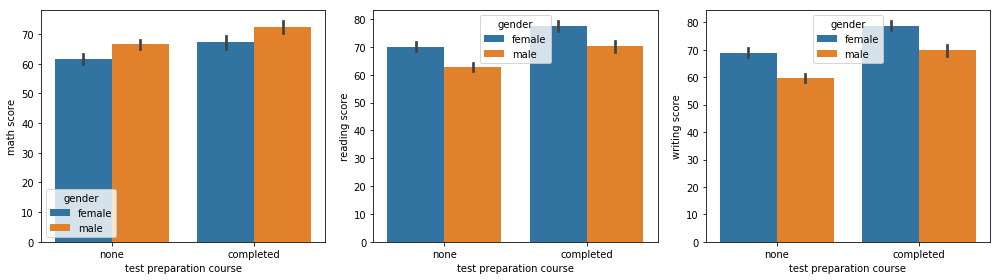

In [22]:
import pandas as pd               
import numpy as np                
import matplotlib.pyplot as plt   
import seaborn as sns             

%matplotlib inline
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.barplot(x = 'test preparation course', y = 'math score',hue = 'gender', data = dataset)

plt.subplot(1,3,2)
sns.barplot(x = 'test preparation course', y = 'reading score', hue = 'gender', data = dataset)

plt.subplot(1,3,3)
sns.barplot(x = 'test preparation course', y = 'writing score',hue = 'gender', data = dataset)


plt.tight_layout()

In [23]:
dataset['race/ethnicity'].loc[dataset['race/ethnicity'] == 'group A'] = 1
dataset['race/ethnicity'].loc[dataset['race/ethnicity'] == 'group B'] = 2
dataset['race/ethnicity'].loc[dataset['race/ethnicity'] == 'group C'] = 3
dataset['race/ethnicity'].loc[dataset['race/ethnicity'] == 'group D'] = 4
dataset['race/ethnicity'].loc[dataset['race/ethnicity'] == 'group E'] = 5

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


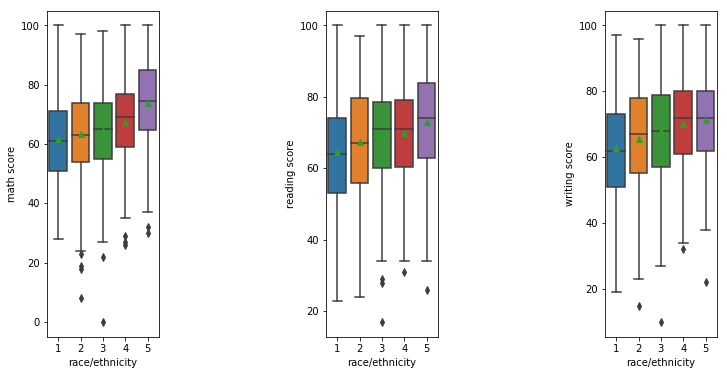

In [24]:
fig, axs = plt.subplots(ncols=3,figsize=(12,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.5, hspace=None);
sns.boxplot(x="race/ethnicity", y="math score", data=dataset, ax=axs[0],showmeans=True);
sns.boxplot(x="race/ethnicity", y="reading score", data=dataset, ax=axs[1],showmeans=True);
sns.boxplot(x="race/ethnicity", y="writing score", data=dataset, ax=axs[2],showmeans=True);

In [40]:
dataset['parental level of education'].loc[dataset['parental level of education'] == 'some high school'] = 1
dataset['parental level of education'].loc[dataset['parental level of education'] == 'high school'] = 2
dataset['parental level of education'].loc[dataset['parental level of education'] == 'associate\'s degree'] = 3
dataset['parental level of education'].loc[dataset['parental level of education'] == 'some college'] = 4
dataset['parental level of education'].loc[dataset['parental level of education'] == 'bachelor\'s degree'] = 5
dataset['parental level of education'].loc[dataset['parental level of education'] == 'master\'s degree'] = 6

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


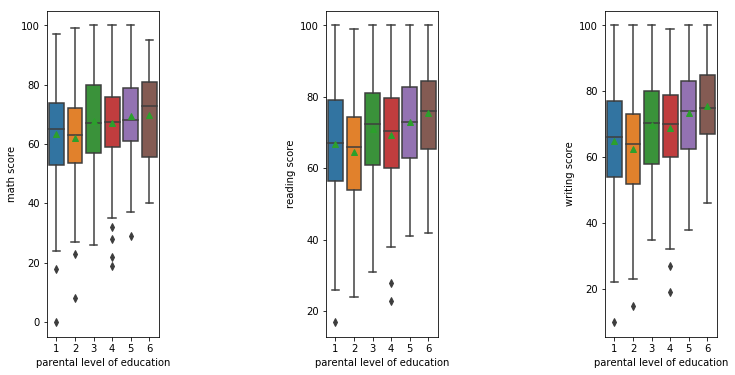

In [41]:
fig, axs = plt.subplots(ncols=3,figsize=(12,6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.5, hspace=None);
sns.boxplot(x="parental level of education", y="math score", data=dataset, ax=axs[0],showmeans=True);
sns.boxplot(x="parental level of education", y="reading score", data=dataset, ax=axs[1],showmeans=True);
sns.boxplot(x="parental level of education", y="writing score", data=dataset, ax=axs[2],showmeans=True);

In [42]:
from sklearn.metrics import confusion_matrix
y_predicted = tree_classifier.predict(X)
matrix = confusion_matrix(Y, y_predicted)
print(matrix)

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print ("Accuracy is ", accuracy_score(Y, y_predicted))

# We have to specify how to combine for the multiclassifications
print ("Precision is ", precision_score(Y, y_predicted, average="weighted"))
print ("Sensitivity is ", recall_score(Y, y_predicted, average="weighted"))
print ("F1 is ", f1_score(Y, y_predicted, average="weighted"))

Accuracy is  1.0
Precision is  1.0
Sensitivity is  1.0
F1 is  1.0


## Comment on the results.

1. The above matrics shows that it is the perfect confusion matrix which has only diogonal values and remaining are zeros
2. Metrics are all equal 1 that means which are more accurate and perfect values. 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


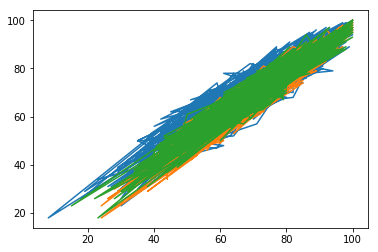

In [32]:
from sklearn.svm import SVC
X = train_set[["math score","reading score","writing score"]]
Y = train_set["Average"]
svm_classifier = SVC(kernel="rbf")
svm_classifier.fit(X,Y)
# plt.plot(X,Y)
plt.plot(kind = "bar")
plt.plot(X,Y)
plt.show()

In [33]:
from sklearn.metrics import confusion_matrix
y_predicted = tree_classifier.predict(X)
matrix = confusion_matrix(Y, y_predicted)
print(matrix)

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print ("Accuracy is ", accuracy_score(Y, y_predicted))

# We have to specify how to combine for the multiclassifications
print ("Precision is ", precision_score(Y, y_predicted, average="weighted"))
print ("Sensitivity is ", recall_score(Y, y_predicted, average="weighted"))
print ("F1 is ", f1_score(Y, y_predicted, average="weighted"))

Accuracy is  1.0
Precision is  1.0
Sensitivity is  1.0
F1 is  1.0


In [35]:
from sklearn.svm import SVC
X = test_set[["math score","reading score","writing score"]]
Y = test_set["Average"]
svm_classifier = SVC(kernel="rbf")
svm_classifier.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [36]:
from sklearn.metrics import confusion_matrix
y_predicted = tree_classifier.predict(X)
matrix = confusion_matrix(Y, y_predicted)
print(matrix)

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print ("Accuracy is ", accuracy_score(Y, y_predicted))

# We have to specify how to combine for the multiclassifications
print ("Precision is ", precision_score(Y, y_predicted, average="weighted"))
print ("Sensitivity is ", recall_score(Y, y_predicted, average="weighted"))
print ("F1 is ", f1_score(Y, y_predicted, average="weighted"))

Accuracy is  0.364
Precision is  0.3831852813852814
Sensitivity is  0.364
F1 is  0.3476579649841192


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Note: 
1. There is a lots of change in test set results and train set results. 
2. In train results all the values are equal to 1 which means all most accurate values. 
3. In test results all the values are not much near to 1 which means they are not much accurate. 
